<a href="https://colab.research.google.com/github/ayush-jangir1/Machine-Learning/blob/main/kmean_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



iris = load_iris()
x = iris.data
y = iris.target

Using Elbow method to find the optimal no of clusters

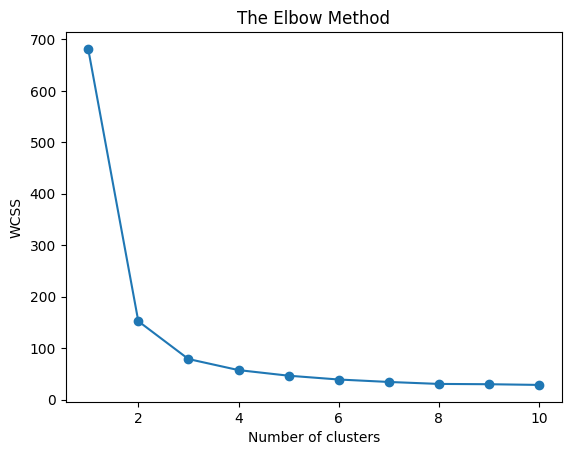

In [2]:
list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)

# Creaitng the Scree Plot
plt.plot(range(1, 11), list1, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means algorithm to data set with optimum number of clusters

In [3]:
kmeans = KMeans(n_clusters=3, random_state=10)
y_kmeans = kmeans.fit_predict(x)
print("The predicted clusters are:", y_kmeans)
print("The centers are:", kmeans.cluster_centers_)

The predicted clusters are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
The centers are: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


Determining the number of observations in the cluster

In [4]:
data = {'Original': y, "Predicted": y_kmeans}
kmeansdf = pd.DataFrame(data, columns = ["Original", 'Predicted'])
print("Details of the predicted cluster are:", kmeansdf["Predicted"].value_counts())

Details of the predicted cluster are: Predicted
2    61
1    50
0    39
Name: count, dtype: int64


Creating names of the clusters

In [5]:
kmeansdf["Original"].replace(to_replace = int("0"), value = "setosa", inplace = True)
kmeansdf["Original"].replace(to_replace = int("1"), value = "versicolor", inplace = True)
kmeansdf["Original"].replace(to_replace = int("2"), value = "virginica", inplace = True)
kmeansdf["Predicted"].replace(to_replace = int("0"), value = "setosa", inplace = True)
kmeansdf["Predicted"].replace(to_replace = int("1"), value = "versicolor", inplace = True)
kmeansdf["Predicted"].replace(to_replace = int("2"), value = "virginica", inplace = True)


<ipython-input-5-51d9ac64cace>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kmeansdf["Original"].replace(to_replace = int("0"), value = "setosa", inplace = True)
<ipython-input-5-51d9ac64cace>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

Creating Confusion Matrix for the model

In [6]:
results = confusion_matrix(kmeansdf["Original"], kmeansdf["Predicted"])
print("The confusion matrix is:", results)

The confusion matrix is: [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


Creating a chart depicting different clusters considering different variables

In [7]:
plt.figure(2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Visualizaing the clusters for sepal.length and sepal.width

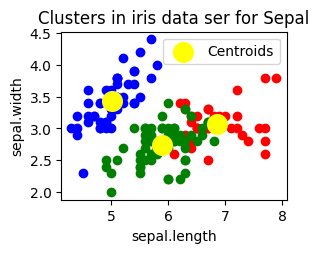

In [8]:
plt.figure(2)
plt.subplot(221)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters in iris data ser for Sepal')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.legend()

Visualizing clusters for petal.length and petal.width

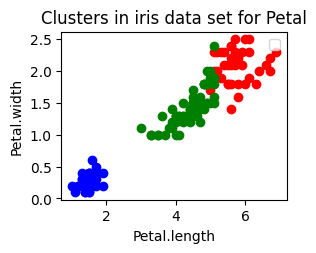

In [9]:
plt.subplot(222)
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], c = 'red')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], c = 'blue')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], c = 'green')
plt.title('Clusters in iris data set for Petal')
plt.xlabel('Petal.length')
plt.ylabel('Petal.width')
plt.legend()

Visualizing Clusters for sepal.length and petal.length

Text(0, 0.5, 'Petal.Length')

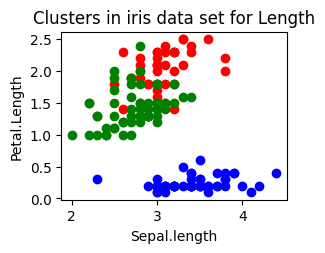

In [10]:
plt.subplot(223)
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 3], c = 'red', label='Setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 3], c = 'blue', label='Versicolor')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 3], c = 'green', label='Virginaca')
plt.title('Clusters in iris data set for Length')
plt.xlabel('Sepal.length')
plt.ylabel('Petal.Length')


Visualizing the clusters for Sepal.width and Petal.width

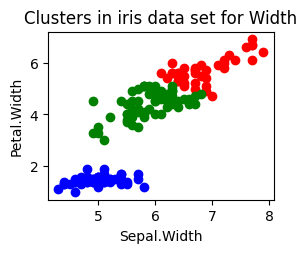

In [11]:
plt.subplot(224)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], c = 'red', label='Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], c = 'blue', label='Versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], c = 'green', label='Virginaca')
plt.title('Clusters in iris data set for Width')
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Width')
plt.show()